# Tugas 4 Deep Learning - Batik Classification - CNN

### Kelompok 3
- Muhammad Alvinza (2304879)
- Muhammad Ichsan Khairullah (2306924)
- Abdurrahman Rauf Budiman (2301102)
- Rasendriya Andhika (2305309)

# Pendahuluan

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

In [5]:
# Tentukan lokasi dataset kamu
data_dir = 'Dataset/USED_DATASETS' # Ganti dengan path folder aslimu

# Parameter Gambar
batch_size = 32       # Jumlah gambar yang diproses sekaligus
img_height = 180      # Tinggi gambar (pixel)
img_width = 180       # Lebar gambar (pixel)

# Memuat data untuk Training (80% data)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,   # Mengambil 20% data untuk validasi
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Memuat data untuk Validasi (20% data)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Cek nama kelas yang ditemukan
class_names = train_ds.class_names
print("Kelas yang ditemukan:", class_names)

Found 1000 files belonging to 2 classes.
Using 800 files for training.
Found 1000 files belonging to 2 classes.
Using 200 files for validation.
Kelas yang ditemukan: ['batik_megamendung', 'batik_parang']


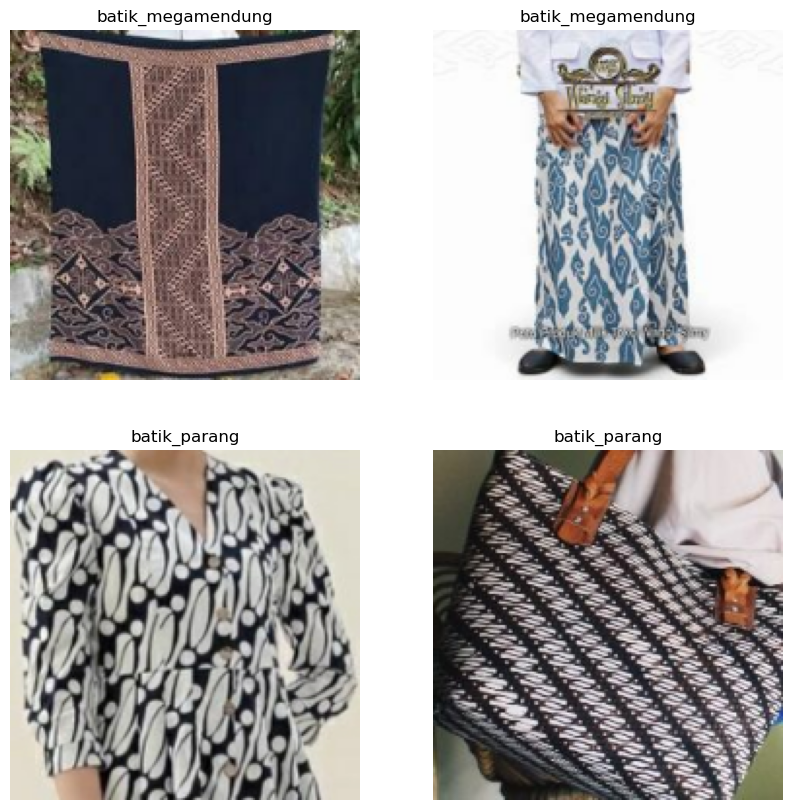

In [12]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")